### UCI Bike Sharing Dataset 
https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset


1. Read Data
2. Premlinary analysis
3. Visualize data
4. check multiple linear regression assumptions
- normality
- autocorrelation
- linear relation
- sample size 
- multi collinearity
5. Drop irrelvant features
6. create and modify features
7. create dummy varibles
8. train and test split
9. fit and score the model
10. present model

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


bikes = pd.read_csv('hour.csv')
bikes

,index,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,demand
0,1,01-01-2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,01-01-2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,01-01-2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,01-01-2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,01-01-2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,31-12-2012,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,31-12-2012,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,31-12-2012,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,31-12-2012,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [6]:
# analysis of Data 

bikes_prep = bikes.copy()
bikes_prep = bikes_prep.drop(['index','date', 'casual', 'registered'], axis=1)

season        0
year          0
month         0
hour          0
holiday       0
weekday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
demand        0
dtype: int64


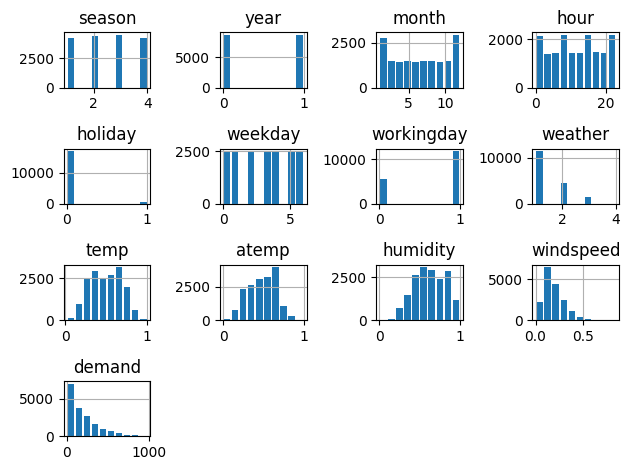

In [7]:
# check nulls or missing values 
print(bikes_prep.isnull().sum())

#visualise using historgram 
bikes_prep.hist(rwidth=0.8)
plt.tight_layout()

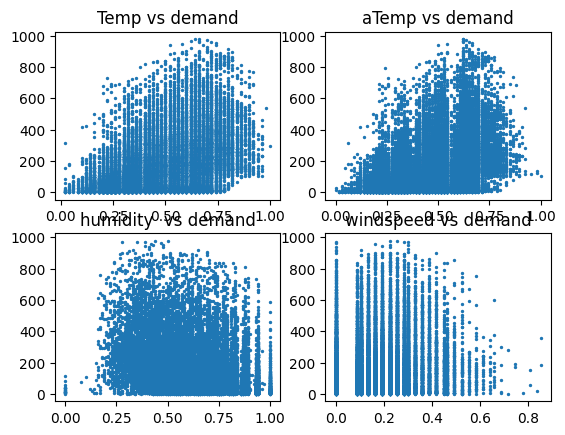

In [ ]:
 #visualise continous varible temp, atemp, humidity, windspeed

plt.subplot(2,2,1)
plt.title('Temp vs demand')
plt.scatter(bikes['temp'],bikes['demand'], s= 2)
plt.subplot(2,2,2)
plt.title('aTemp vs demand')
plt.scatter(bikes['atemp'],bikes['demand'], s= 2)
plt.subplot(2,2,3)
plt.title('humidity  vs demand')
plt.scatter(bikes['humidity'],bikes['demand'], s= 2)
plt.subplot(2,2,4)
plt.title('windspeed vs demand')
plt.scatter(bikes['windspeed'],bikes['demand'], s= 2)
# concuslions 
# as demand increase with increase in temp and atemp 
# atemp and temp seems correlated
# there is very less effect of humidity on demand 
# windspeed initial no effect after point start decreases



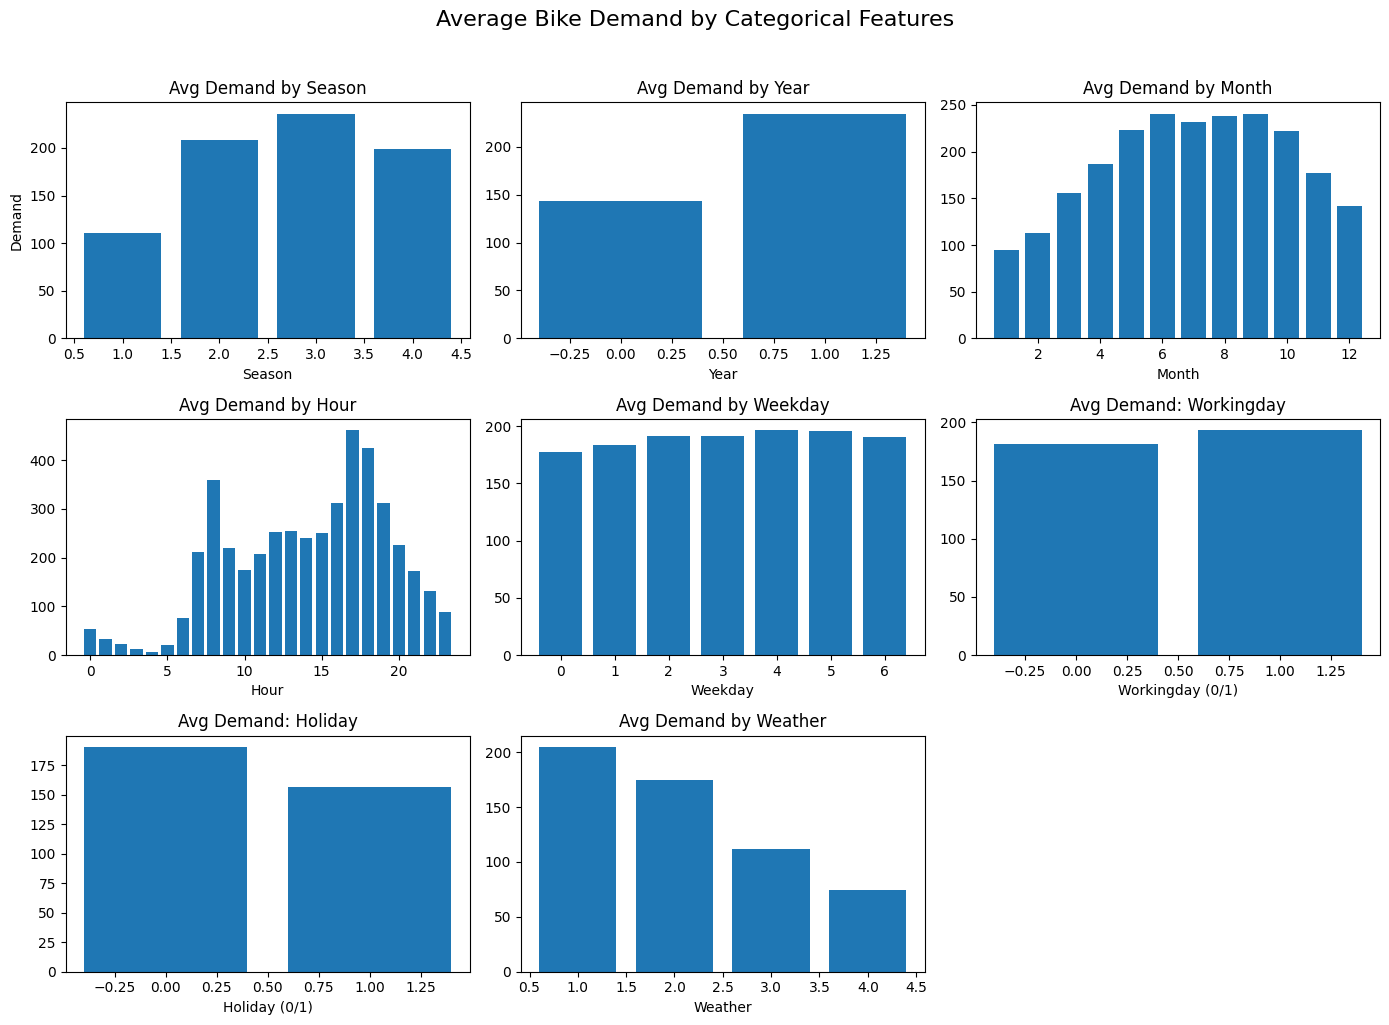

In [16]:
# ...existing code...
# visualize categorical data (added Year and Hour)
plt.figure(figsize=(14,10))

# Season
plt.subplot(3,3,1)
cat_avg = bikes_prep.groupby('season')['demand'].mean()
plt.bar(cat_avg.index, cat_avg.values)
plt.title('Avg Demand by Season')
plt.xlabel('Season')
plt.ylabel('Demand')

# Year (change to 'yr' if your column name is different)
plt.subplot(3,3,2)
cat_avg = bikes_prep.groupby('year')['demand'].mean()
plt.bar(cat_avg.index, cat_avg.values)
plt.title('Avg Demand by Year')
plt.xlabel('Year')

# Month
plt.subplot(3,3,3)
cat_avg = bikes_prep.groupby('month')['demand'].mean()
plt.bar(cat_avg.index, cat_avg.values)
plt.title('Avg Demand by Month')
plt.xlabel('Month')

# Hour (change to 'hour' or 'hr' depending on column name)
plt.subplot(3,3,4)
cat_avg = bikes_prep.groupby('hour')['demand'].mean()
plt.bar(cat_avg.index, cat_avg.values)
plt.title('Avg Demand by Hour')
plt.xlabel('Hour')

# Weekday
plt.subplot(3,3,5)
cat_avg = bikes_prep.groupby('weekday')['demand'].mean()
plt.bar(cat_avg.index, cat_avg.values)
plt.title('Avg Demand by Weekday')
plt.xlabel('Weekday')

# Workingday
plt.subplot(3,3,6)
cat_avg = bikes_prep.groupby('workingday')['demand'].mean()
plt.bar(cat_avg.index, cat_avg.values)
plt.title('Avg Demand: Workingday')
plt.xlabel('Workingday (0/1)')

# Holiday
plt.subplot(3,3,7)
cat_avg = bikes_prep.groupby('holiday')['demand'].mean()
plt.bar(cat_avg.index, cat_avg.values)
plt.title('Avg Demand: Holiday')
plt.xlabel('Holiday (0/1)')

# Weather
plt.subplot(3,3,8)
cat_avg = bikes_prep.groupby('weather')['demand'].mean()
plt.bar(cat_avg.index, cat_avg.values)
plt.title('Avg Demand by Weather')
plt.xlabel('Weather')

# Empty 9th subplot (turn off)
plt.subplot(3,3,9)
plt.axis('off')

plt.suptitle('Average Bike Demand by Categorical Features', fontsize=16, y=1.02)
plt.tight_layout()

# conculsion from data
1. There is no effect of humidity on demand.
2. Atemp and temp has the same temperature.  drop a temp
3. check in correlation can we drop windspeed,

3. Weeekday and workingday has very little effect on demand 
4. Year also not makes sense as it is two years only data only. 
5. variation based on season, hour,month, weather, holiday.

features to drop -> atemp, windspeed, year, weekday , workingday


In [19]:
# check for outliers 
print(bikes_prep['demand'].describe())


bikes_prep['demand'].quantile([0.05,0.1, 0.15, 0.9, 0.95, 0.99])


count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: demand, dtype: float64


0.05      5.00
0.10      9.00
0.15     16.00
0.90    451.20
0.95    563.10
0.99    782.22
Name: demand, dtype: float64

In [ ]:
# check multi collinearity 
# find correlation coefficient coefficient matrix using corr
corr_coef = bikes_prep[['temp','atemp','humidity','windspeed','demand']].corr()
corr_coef
# atemp and temp are highly correlated we can drop
# windspeed and demand correlation coefficient almost 0 ==> we can drop windspped also

,temp,atemp,humidity,windspeed,demand
temp,1.000000,0.987672,-0.069881,-0.023125,0.404772
atemp,0.987672,1.000000,-0.051918,-0.062336,0.400929
humidity,-0.069881,-0.051918,1.000000,-0.290105,-0.322911
windspeed,-0.023125,-0.062336,-0.290105,1.000000,0.093234
demand,0.404772,0.400929,-0.322911,0.093234,1.000000


In [ ]:
bikes_prep = bikes_prep.drop(['atemp', 'windspeed', 'year', 'weekday' , 'workingday'], axis=1)

(array([-12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,
          1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12]),
 array([0.45474717, 0.4704956 , 0.49622816, 0.49404055, 0.46795937,
        0.47732046, 0.5267577 , 0.5914575 , 0.6520158 , 0.71519554,
        0.8059103 , 0.9253097 , 1.        , 0.9253097 , 0.8059103 ,
        0.71519554, 0.6520158 , 0.5914575 , 0.5267577 , 0.47732046,
        0.46795937, 0.49404055, 0.49622816, 0.4704956 , 0.45474717],
       dtype=float32),
 <matplotlib.lines.Line2D at 0x26a101c3610>)

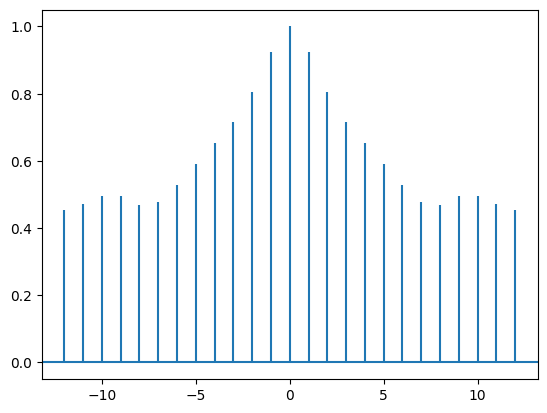

In [23]:
# find autocorrelationg in demand using acoor
df1 = pd.to_numeric(bikes_prep['demand'], downcast='float')
plt.acorr(df1, maxlags=12)

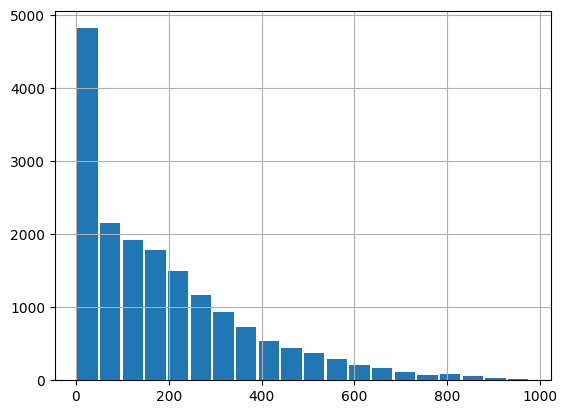

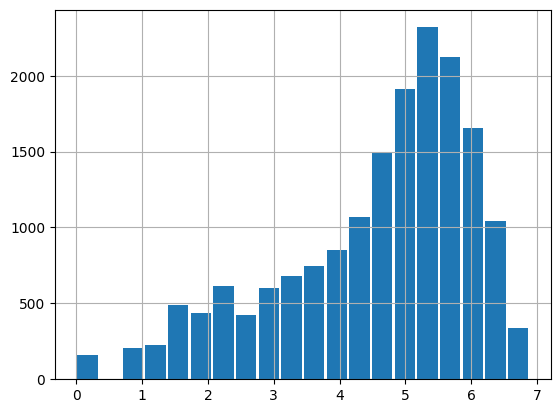

In [25]:
# data normalization
df1 = bikes_prep['demand']
df2 = np.log(df1)

plt.figure()
df1.hist(rwidth=0.9, bins=20)
plt.figure()
df2.hist(rwidth=0.9, bins=20)


bikes_prep['demand'] = np.log(bikes_prep['demand'])

In [32]:
# solve problem of auto correlation 
# autocorrelation in demand column 
t_1 =  bikes_prep['demand'].shift(+1).to_frame()
t_1.columns = ['t_1']

t_2 =  bikes_prep['demand'].shift(+2).to_frame()
t_2.columns = ['t_2']

t_3 =  bikes_prep['demand'].shift(+3).to_frame()
t_3.columns = ['t_3']

bikes_prep_lags = pd.concat([bikes_prep, t_1, t_2, t_3], axis=1)

bikes_prep_lags = bikes_prep_lags.dropna()

In [33]:
# create a dummy varible for categorical varible 
# season , holiday, month , weather, hour

# To work get_dummies we need the dtype should be categrorical 

print(bikes_prep_lags.dtypes)
bikes_prep_lags['season'] = bikes_prep_lags['season'].astype('category')
bikes_prep_lags['holiday'] = bikes_prep_lags['holiday'].astype('category')
bikes_prep_lags['month'] = bikes_prep_lags['month'].astype('category')
bikes_prep_lags['weather'] = bikes_prep_lags['weather'].astype('category')
bikes_prep_lags['hour'] = bikes_prep_lags['hour'].astype('category')

print(bikes_prep_lags.dtypes)
bikes_prep_lags = pd.get_dummies(bikes_prep_lags, drop_first=True)


season        int64
month         int64
hour          int64
holiday       int64
weather       int64
temp        float64
humidity    float64
demand      float64
t_1         float64
t_2         float64
t_3         float64
dtype: object
season      category
month       category
hour        category
holiday     category
weather     category
temp         float64
humidity     float64
demand       float64
t_1          float64
t_2          float64
t_3          float64
dtype: object


In [35]:
# we need to split the trains and test data time dependent

Y = bikes_prep_lags['demand']
X =  bikes_prep_lags.drop(['demand'],axis=1)

tr_size =  int(0.7 * len(X))

x_train = X.values[0:tr_size]
x_test = X.values[tr_size : len(X)]

y_train = Y.values[0:tr_size]
y_test = Y.values[tr_size: len(Y)]

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x_train,y_train)

r2_train = reg.score(x_train,y_train)
r2_test =  reg.score(x_test, y_test)


y_predict = reg.predict(x_test)


from sklearn.metrics import root_mean_squared_error

rmse = root_mean_squared_error(y_test,y_predict)
print(rmse)




0.3809880049817039


In [38]:
# root mean squared log
# it is preferred for non- negative predictios and less  vaarations for small and large predictions

from sklearn.metrics import root_mean_squared_log_error

rmsle = root_mean_squared_log_error(y_test,y_predict)
rmsle

0.11087545659246141